<a href="https://colab.research.google.com/github/GreenStreetQuant/Stock-Price-Fetcher/blob/master/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Stock Analysis
Would you like to Analyze a Stock? Yes or No
 :yes
Enter the Ticker of the Stock
 :aapl
Enter Start Date in YYYY-MM-DD Format 
 :2019-01-01
Enter End Date in YYYY-MM-DD Format 
 :2019-12-31


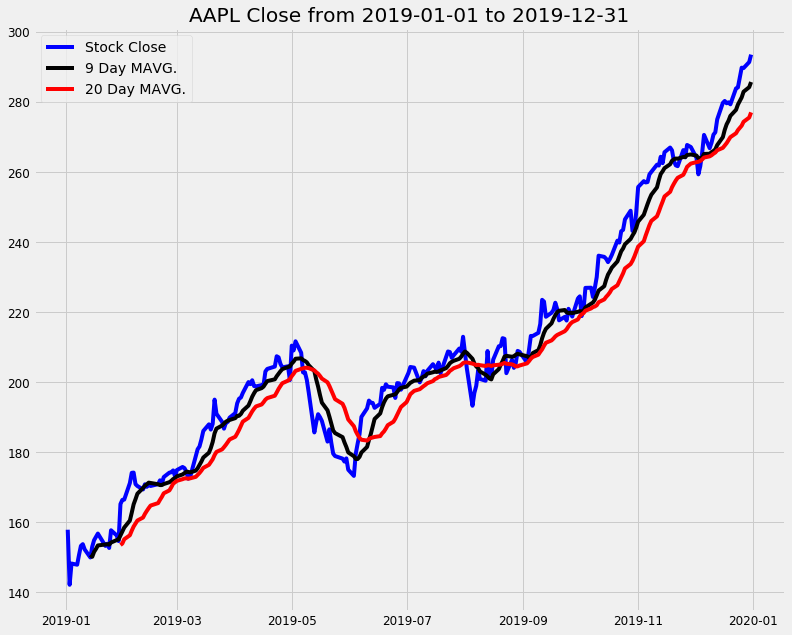

Do you want to look at another stock? :no


In [4]:
from pandas_datareader import data 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

def get_prices(ticker):
  for stck in ticker:
    ticker = data.DataReader(ticker, 'yahoo', start_date, end_date)
    ticker = ticker.drop(columns='Adj Close')
    return ticker

def plot(chart):

  short_ma = chart['Close'].rolling(window=9).mean()
  long_ma = chart['Close'].rolling(window=20).mean()

  plt.figure(figsize=(12,10))
  orig = plt.plot(chart['Close'], color='blue', label='Stock Close')
  mean1 = plt.plot(short_ma, color='black', label='9 Day MAVG.')
  mean2 = plt.plot(long_ma, color='r', label='20 Day MAVG.')
  plt.legend(loc='best')
  plt.title(f'{ticker} Close from {start_date} to {end_date}')
  plt.show(block=False)

def replay():
  return input('Do you want to look at another stock? :').lower().startswith('y')

print('Welcome to Stock Analysis')

while True:
  run_analysis = input('Would you like to Analyze a Stock? Yes or No\n :').lower()

  if run_analysis[0] == 'y':
    analysis_on = True
  else:
    analysis_on = False
  
  while analysis_on:

    ticker = str(input('Enter the Ticker of the Stock\n :').upper())

    start_date = str(input('Enter Start Date in YYYY-MM-DD Format \n :'))

    end_date = str(input('Enter End Date in YYYY-MM-DD Format \n :'))

    chart = get_prices(ticker)

    plot(chart)

    break
  
  if not replay():
    break

